In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

In [2]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                    start=start_date, 
                    end=end_date, 
                    progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

                         Date        Open        High         Low       Close  \
247 2022-10-04 00:00:00-04:00  101.040001  102.720001  101.040001  102.410004   
248 2022-10-05 00:00:00-04:00  100.690002  102.739998   99.739998  102.220001   
249 2022-10-06 00:00:00-04:00  101.500000  103.730003  101.500000  102.239998   
250 2022-10-07 00:00:00-04:00  100.650002  101.419998   99.209999   99.570000   
251 2022-10-10 00:00:00-04:00   99.849998   99.989998   97.870003   98.709999   

      Adj Close    Volume  
247  102.410004  22580900  
248  102.220001  18475500  
249  102.239998  17156200  
250   99.570000  24232300  
251   98.709999  16501700  


In [3]:
data = data[["Date", "Close"]]
print(data.head())

                       Date       Close
0 2021-10-11 00:00:00-04:00  138.847504
1 2021-10-12 00:00:00-04:00  136.712997
2 2021-10-13 00:00:00-04:00  137.899994
3 2021-10-14 00:00:00-04:00  141.412003
4 2021-10-15 00:00:00-04:00  141.675003


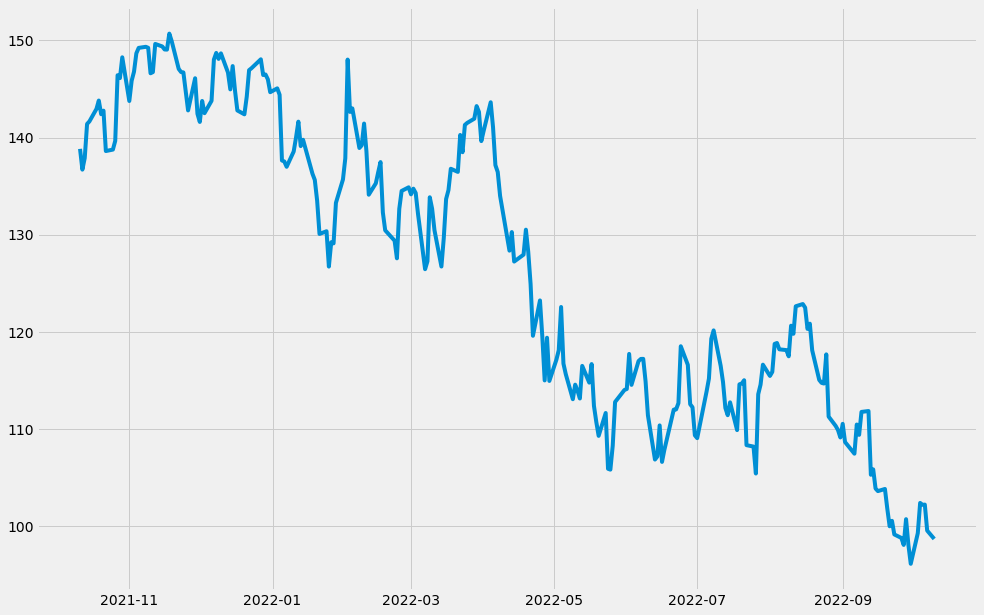

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 432x288 with 0 Axes>

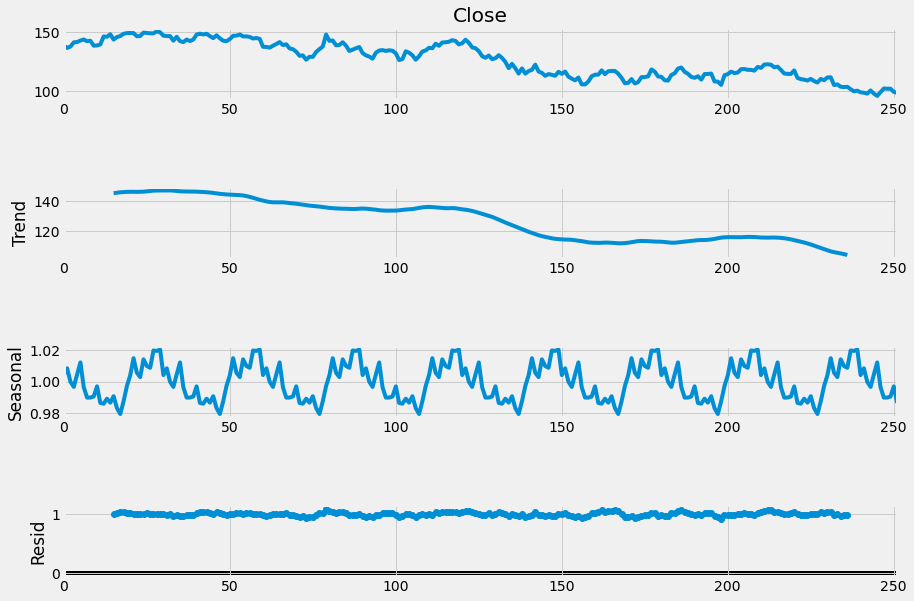

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],
                            model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

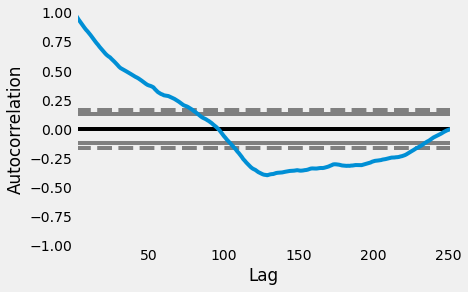

In [8]:
pd.plotting.autocorrelation_plot(data["Close"])

c:\Users\artur\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


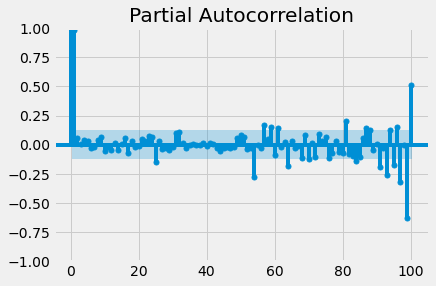

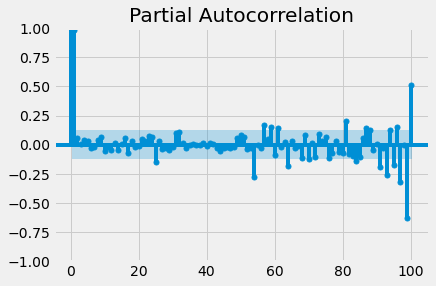

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [14]:
p, d, q = 5, 1, 4
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()
print(fitted.summary())

c:\Users\artur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -601.479
Date:                Tue, 11 Oct 2022   AIC                           1222.959
Time:                        14:06:55   BIC                           1258.213
Sample:                             0   HQIC                          1237.146
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0054      0.112      0.048      0.962      -0.215       0.226
ar.L2          1.6575      0.073     22.662      0.000       1.514       1.801
ar.L3          0.0377      0.150      0.251      0.8

In [15]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      138.847442
2      136.844162
3      137.810945
4      141.289247
          ...    
247     99.288183
248    102.737219
249    102.108512
250    102.428390
251     99.561660
Name: predicted_mean, Length: 252, dtype: float64


In [16]:
import warnings
model = sm.tsa.statespace.SARIMAX(data['Close'],
                                  order=(p, d, q),
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

c:\Users\artur\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\artur\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\artur\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(5, 1, 4)x(5, 1, 4, 12)   Log Likelihood                -584.699
Date:                            Tue, 11 Oct 2022   AIC                           1207.397
Time:                                    14:13:44   BIC                           1273.450
Sample:                                         0   HQIC                          1234.015
                                            - 252                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2995      0.576      0.520      0.603      -0.830       1.429
ar.L2         -0.0015      0.738   

In [17]:
predictions = model.predict(len(data), len(data) + 10)
print(predictions)

252    96.775078
253    95.088690
254    94.812646
255    96.618638
256    94.248963
257    93.207928
258    95.299127
259    92.945025
260    93.589126
261    94.412831
262    94.475093
Name: predicted_mean, dtype: float64


<AxesSubplot:>

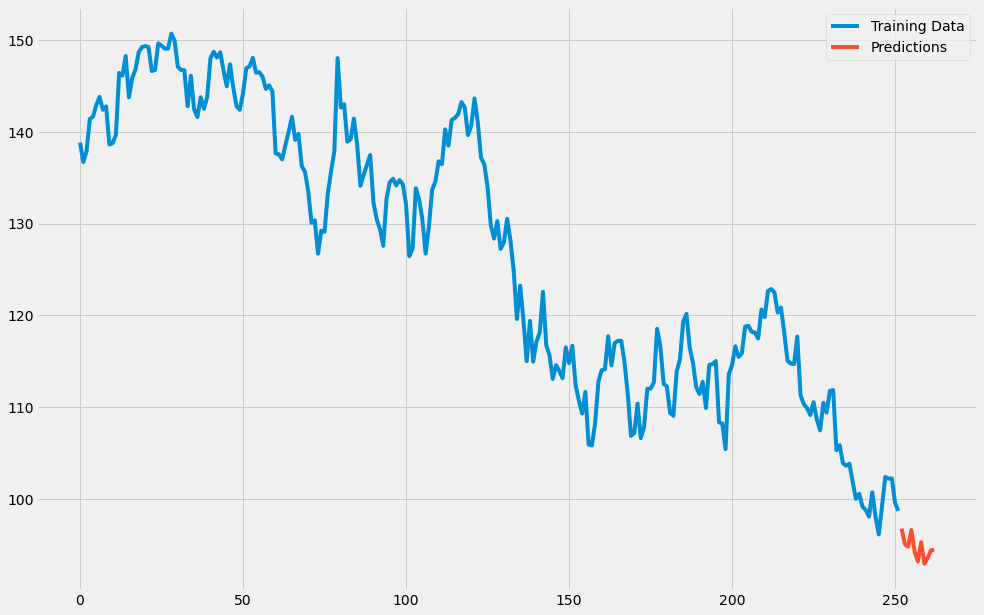

In [18]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")